# Perkenalan

In [453]:
'''
=================================================
GRADED CHALLENGE 06 PHASE 1

Nama  : Dendy Dwinanda
Batch : RMT-030

Program ini dibuat untuk melakukan Clustering data set dari data informasi 
penggunaan kartu kredit selama 6 bulan untuk melihat sifat penggunaan kartu
kredit berdasarkan cluster yang terbentuk. 

Analisis SMART :
- Spesific = Membuat clustering data untuk melihat perilaku pengguna kartu kredit
berdasarkan kluster yang terbentuk.

- Measurable = Menganalisa perilaku antar cluster yang terbentuk.

- Achievable = Medapatkan model clustering untuk costumer segmentation dari 
data informasi penggunaan kartu kredit selama 6 bulan terakhir.

- Relevant = Membantu bagian terkait untuk melihat data pengguna kartu kredit
dengan memberikan informasi perilaku pengguna kartu.

- Time-bound = Model clustering akan dievaluasi dalam 3 bulan kedepan untuk 
meningkatkan akurasi analisa.

=================================================
'''

'\n=================================================\nGRADED CHALLENGE 06 PHASE 1\n\nNama  : Dendy Dwinanda\nBatch : RMT-030\n\nProgram ini dibuat untuk melakukan Clustering data set dari data informasi \npenggunaan kartu kredit selama 6 bulan untuk melihat sifat penggunaan kartu\nkredit berdasarkan cluster yang terbentuk. \n\nAnalisis SMART :\n- Spesific = Membuat clustering data untuk melihat perilaku pengguna kartu kredit\nberdasarkan kluster yang terbentuk.\n\n- Measurable = Menganalisa perilaku antar cluster yang terbentuk.\n\n- Achievable = Medapatkan model clustering untuk costumer segmentation dari \ndata informasi penggunaan kartu kredit selama 6 bulan terakhir.\n\n- Relevant = Membantu bagian terkait untuk melihat data pengguna kartu kredit\ndengan memberikan informasi perilaku pengguna kartu.\n\n- Time-bound = Model clustering akan dievaluasi dalam 3 bulan kedepan untuk \nmeningkatkan akurasi analisa.\n\n=================================================\n'

# Query SQL

In [454]:
'''
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_030_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
'''

'\nSELECT * FROM `ftds-hacktiv8-project.phase1_ftds_030_rmt.credit-card-information`\nWHERE MOD(CUST_ID, 2) = 0;\n'

# Import Libraries

In [498]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import json, pickle

# Data Loading

In [456]:
# data loading
data = pd.read_csv('P1G6_Set_1_dendy_dwinanda.csv')

# menampilkan 10 data head
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [457]:
# menampilkan 10 data tail
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [458]:
# melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [459]:
# Drop data customer id
data_cleaned = data.drop(['CUST_ID'], axis=1)

In [460]:
# cleaning missing value
data_clean = data_cleaned.dropna()

In [461]:
data_clean.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,1600.114511,0.895236,1025.274057,600.770438,424.888909,986.980658,0.495675,0.205447,0.369805,0.136236,3.252549,14.801900,4524.431479,1785.801612,854.624165,0.162997,11.531511
std,2107.347942,0.206730,2241.729131,1690.105736,940.627467,2159.134558,0.399564,0.299252,0.398217,0.200511,6.576772,24.473182,3688.856008,2997.093142,2306.642962,0.299700,1.324580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000
25%,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000
50%,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000
75%,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


# EDA

Text(0.5, 1.0, 'BALANCE')

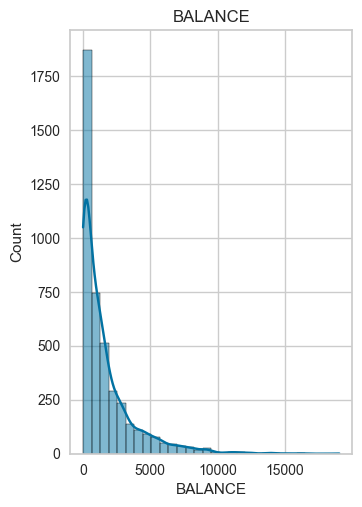

In [462]:
# ratio bayar dan gagal bayar pemilik credit card

plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data_clean.BALANCE,kde=True,bins=30)
plt.title('BALANCE')


Text(0.5, 1.0, 'FREKUENSI UPDATE BALANCE')

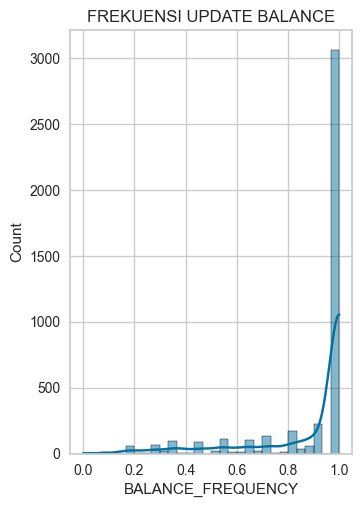

In [463]:
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data_clean.BALANCE_FREQUENCY,kde=True,bins=30)
plt.title('FREKUENSI UPDATE BALANCE')

Text(0.5, 1.0, 'FREKUENSI PEMBELIAN')

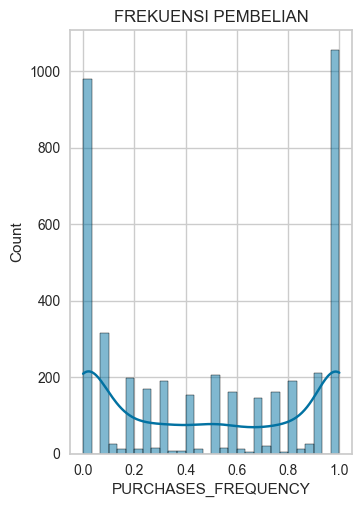

In [464]:
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data_clean.PURCHASES_FREQUENCY,kde=True,bins=30)
plt.title('FREKUENSI PEMBELIAN')

Text(0.5, 1.0, 'FREKUENSI PEMBELIAN MAX')

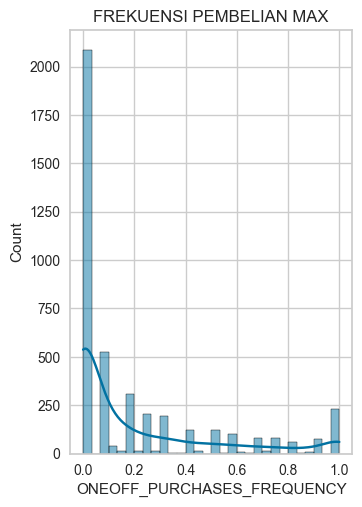

In [465]:
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data_clean.ONEOFF_PURCHASES_FREQUENCY,kde=True,bins=30)
plt.title('FREKUENSI PEMBELIAN MAX')

Text(0.5, 1.0, 'FREKUENSI PEMBAYARAN CICILAN')

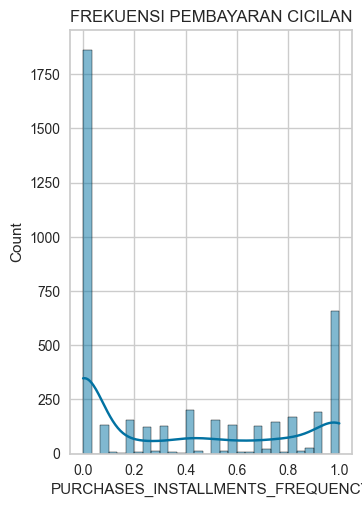

In [466]:
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data_clean.PURCHASES_INSTALLMENTS_FREQUENCY,kde=True,bins=30)
plt.title('FREKUENSI PEMBAYARAN CICILAN')

Insight :

- Balance merupakan limit pembelian data ditunjukan dengan persebaran data berdasarkan limit tiap akun
- Frekuensi Balance merupakan pemanfaatan nilai pembelian dari maksimum limit pembelian.
- Frekuensi Pembelian di tunjukan dengan seberapa sering akun tersebut menggunakan kartu kredit untuk pembelian
- Frekuensi one off purchases menunjukan seberapa sering pengguna melakukan pembelian pada sekali jalan.
- Frekuensi pembayaran dengan cicilan menunjukan seberapa sering pengguna menggunakan kartu kredit untuk pembayaran cicilan

# Feature Engineer

## Numeric

In [467]:
# Define kolom numeric
num_cols = list(data_clean.select_dtypes(exclude='object').columns)
num_cols

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

## Data Winsorizer

In [468]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['BALANCE','BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

windsoriser.fit(data_clean)

data_clean_wins = windsoriser.transform(data_clean)

## Scalling

In [469]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean_wins)


## PCA

In [470]:
# Dimensionality Reduction using PCA
pca1 = PCA()
pca1.fit(data_scaled)
sales_scaled_pca = pca1.transform(data_scaled)

Text(0, 0.5, 'Eigenvalues')

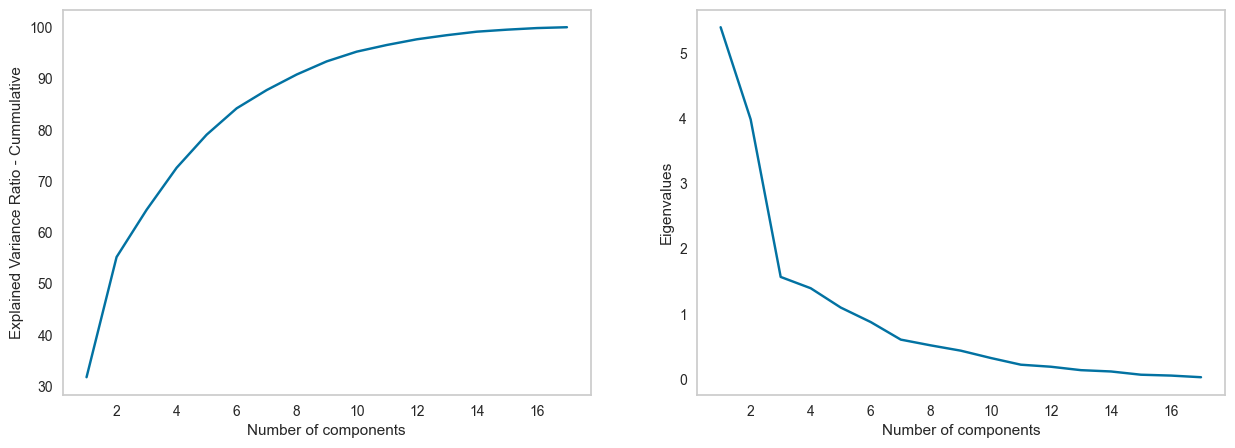

In [471]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca1.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca1.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [472]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca1.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

In [473]:
# Let's train the model with 95 % of the original dataset information

pca2 = PCA(n_components=0.95)
pca2.fit(data_scaled)

data_scaled_pca = pca2.transform(data_scaled)

# Model Definition

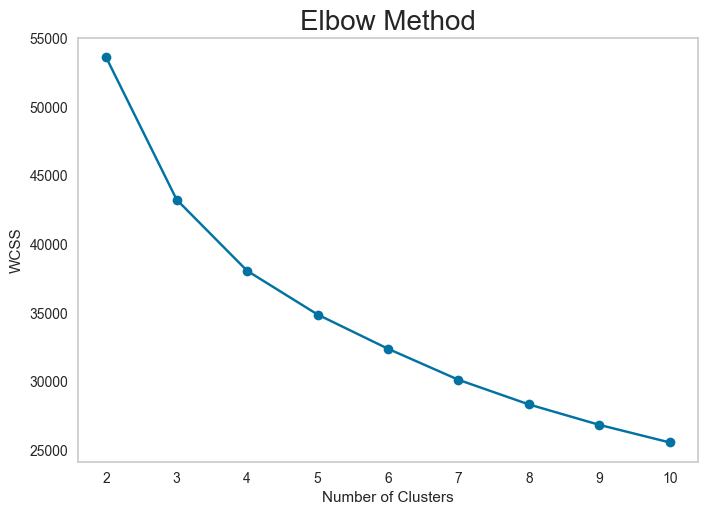

In [474]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Insight :
Dari hasil visualisasi diatas sekilas kita mendapatkan nilai k=3, dimana penurunan inersianya tidak lagi signifikan setelah nilai k=3

Conseptual Problem :
- Inertia merupakan indikator pemisahan data berdasarkan karakteristik yang akan dimasukan kedalam sebuah cluster. Signifikansi inertia merupakan indikator pemisahan data yang akan di bagi menjadi bebebrapa cluster.
- Elbow Method digunakan untuk menentukan K (banyaknya kluster) berdasarkan karakteristik data dengan titik maksimal kluster ditentukan oleh banyak nya hyperparameter yang digunakan.

In [475]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2295248357316556
For n_clusters = 3 The average silhouette_score is : 0.22808209834838192
For n_clusters = 4 The average silhouette_score is : 0.20775075480993638
For n_clusters = 5 The average silhouette_score is : 0.20273958621119223
For n_clusters = 6 The average silhouette_score is : 0.21588551831213465
For n_clusters = 7 The average silhouette_score is : 0.2168263138865952
For n_clusters = 8 The average silhouette_score is : 0.2195475891742809
For n_clusters = 9 The average silhouette_score is : 0.2093822054631299


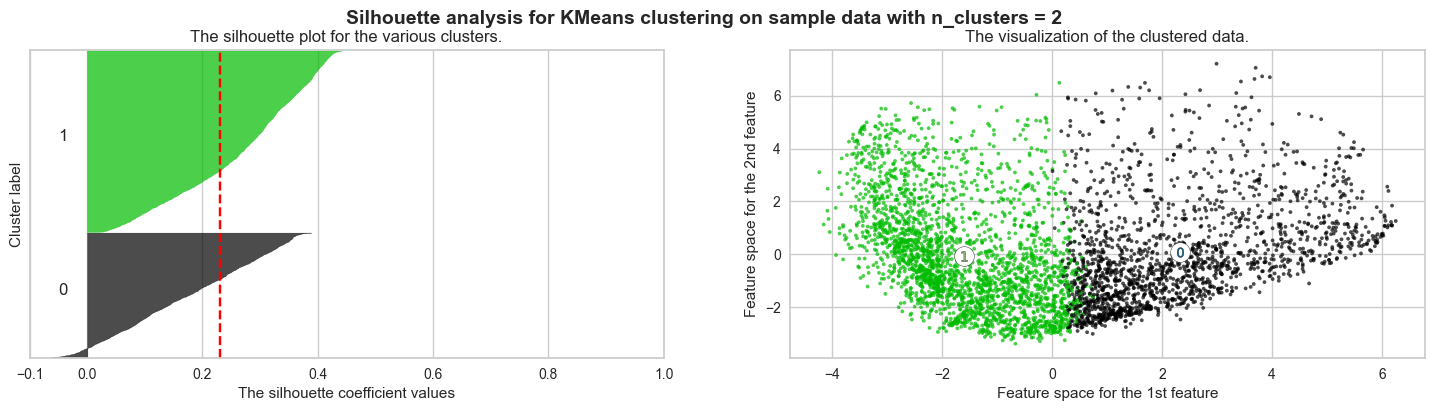

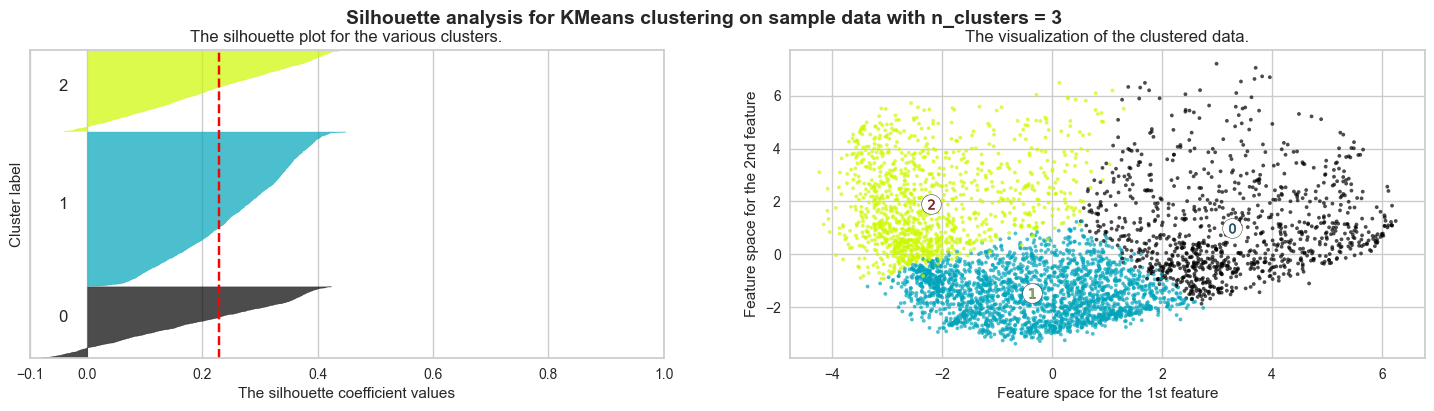

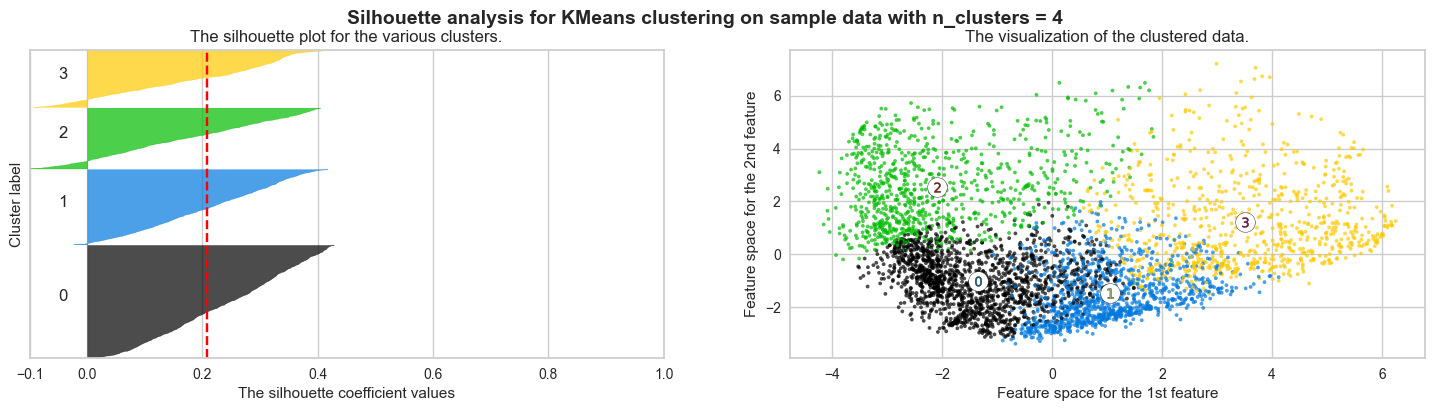

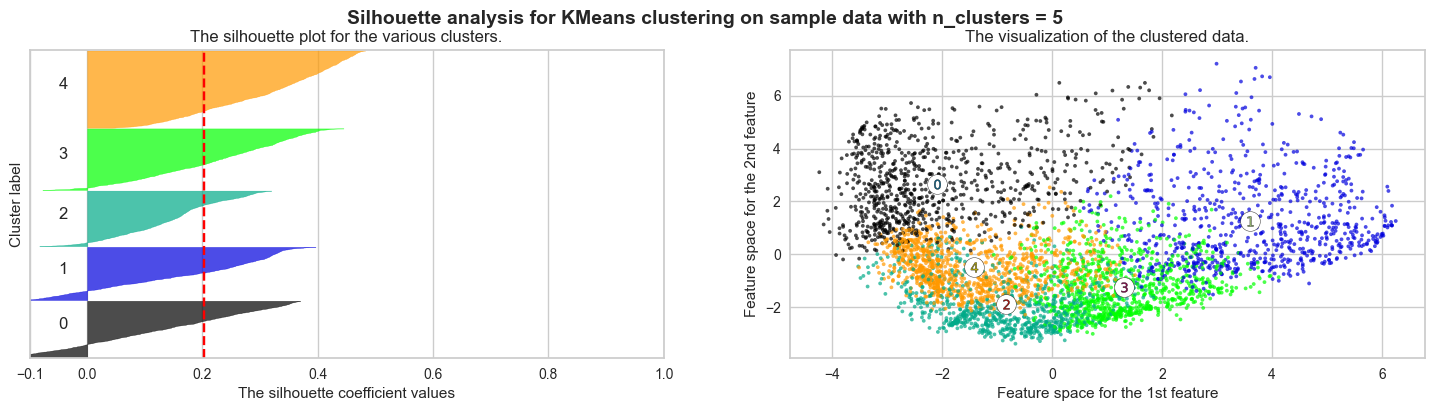

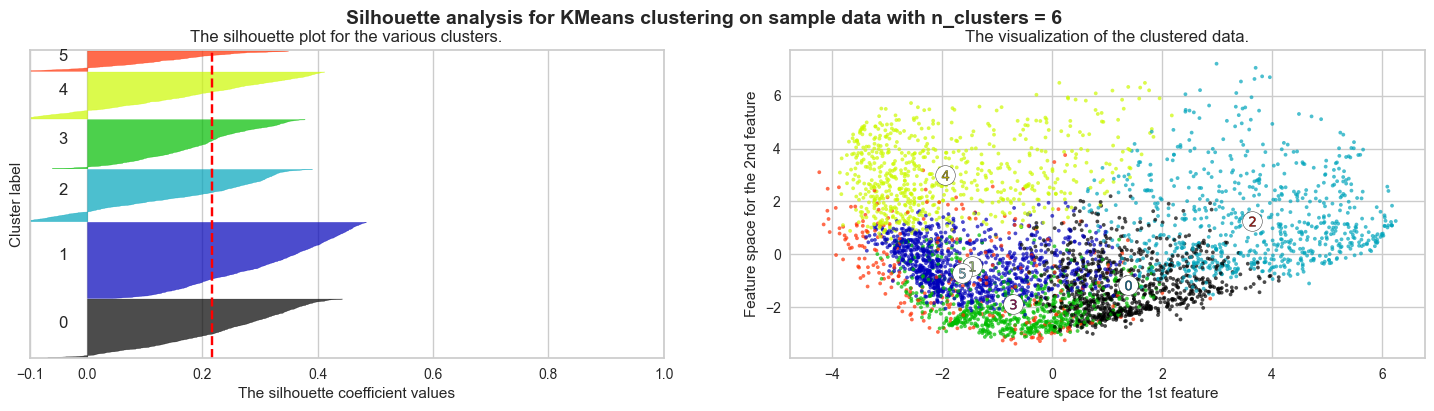

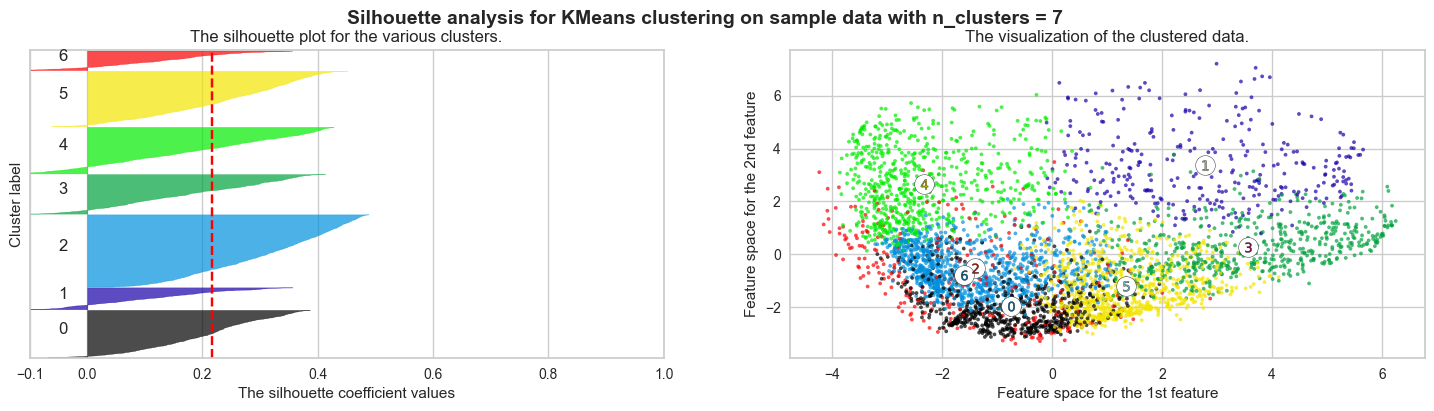

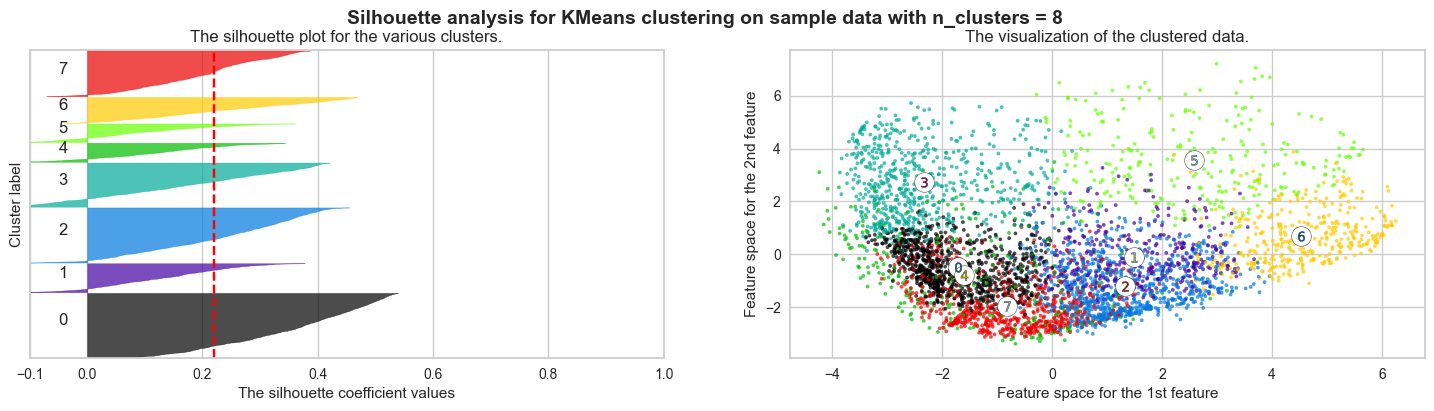

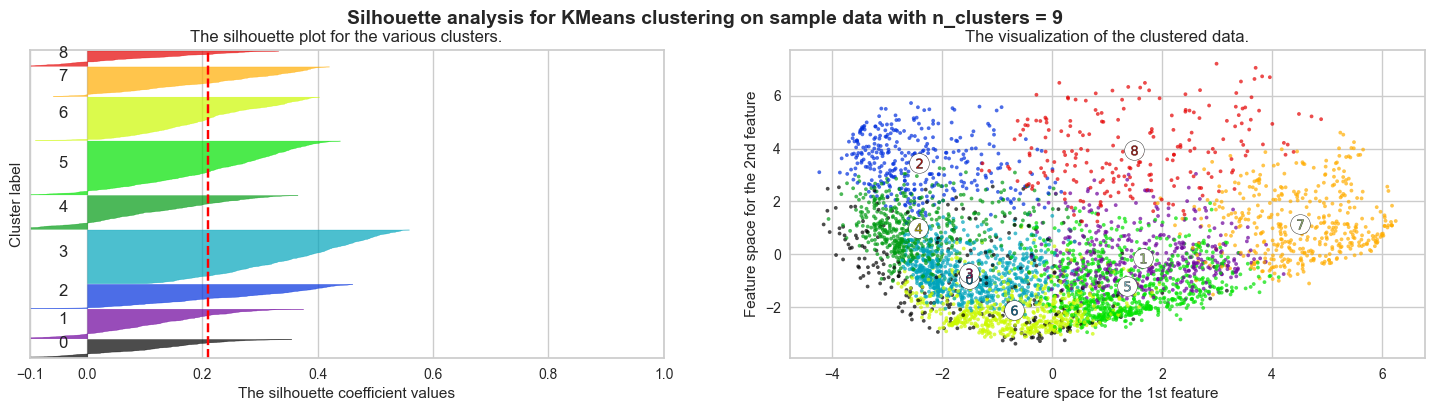

In [476]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)

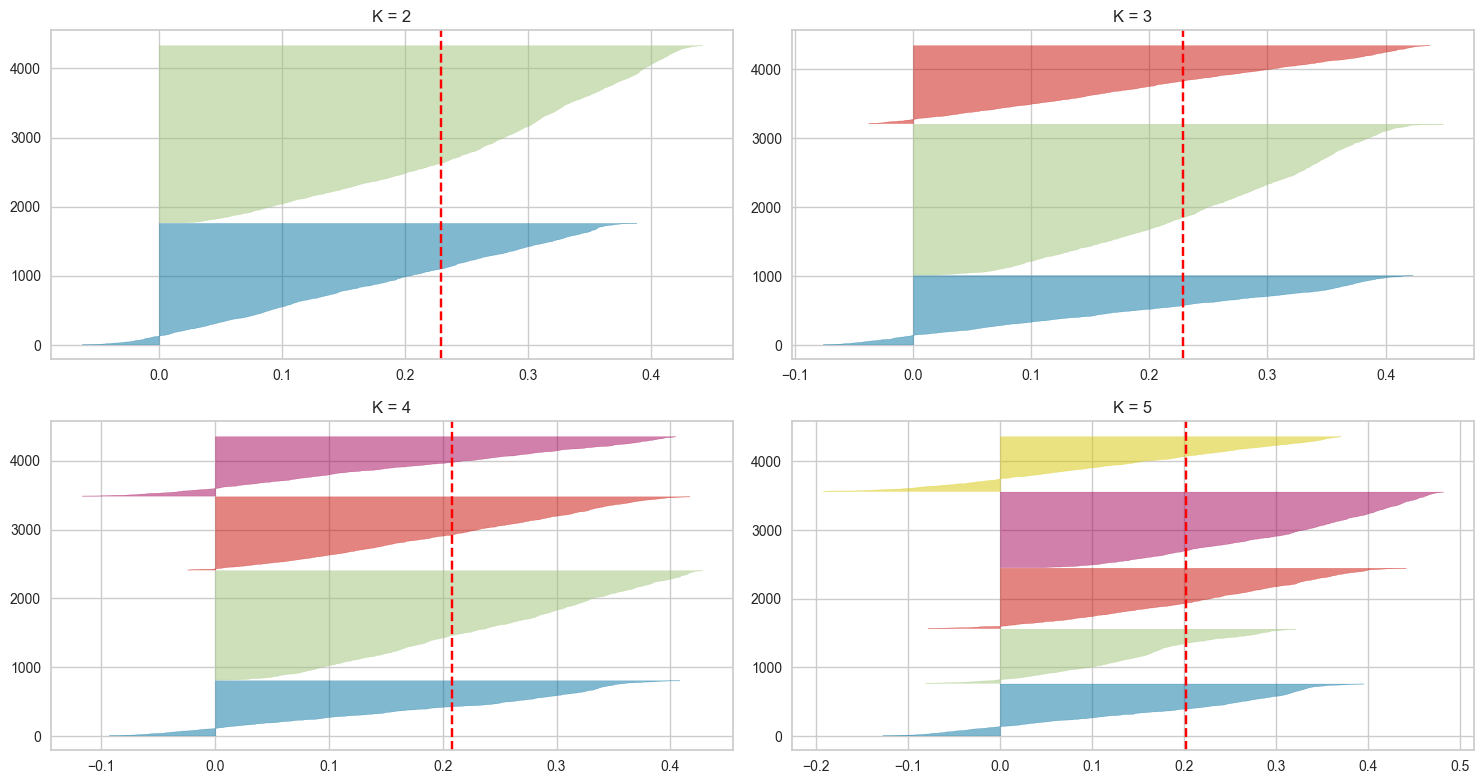

In [477]:
#Silhoutte Plot Analysis

# Set up subplots
#diatur mau dicoba berapa cluster disini
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(data_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Insight :
- Dilihat dari elbow method dan silhouette plot, dapat diambil kesimpulan penggunaan cluster yang maksimal ada pada pemilihan 3 cluster.
- Dari signifikansi nilai inertia pada elbow method maupun nilai silhouette score dan silhouette plot menunjukan bahwa 3 kluster merupakan nilai optimum dalam mengklasifikasikan data, sehingga selanjutnya nilai n_cluster yang dipakai menjadi 3 cluster untuk mewakili karakteristik seluruh data  

# Model Training

In [478]:
# Train with optimal number of clusters

km2 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
pred = km2.fit_predict(data_scaled_pca)
pred

array([1, 1, 1, ..., 2, 2, 2])

# Model Evaluation

In [479]:
# Insert clustering result into original dataset

df_kmeans = data_clean.copy() #ini biar nyoba2 model lain
df_kmeans['cluster'] = pred
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,2
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,2
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,2


In [480]:
df_kmeans.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,1600.114511,0.895236,1025.274057,600.770438,424.888909,986.980658,0.495675,0.205447,0.369805,0.136236,3.252549,14.801900,4524.431479,1785.801612,854.624165,0.162997,11.531511,1.031511
std,2107.347942,0.206730,2241.729131,1690.105736,940.627467,2159.134558,0.399564,0.299252,0.398217,0.200511,6.576772,24.473182,3688.856008,2997.093142,2306.642962,0.299700,1.324580,0.702869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000,0.000000
25%,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000,1.000000
50%,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000,1.000000
75%,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000,2.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000,2.000000


## Visualisasi EDA after Clustering

<Axes: >

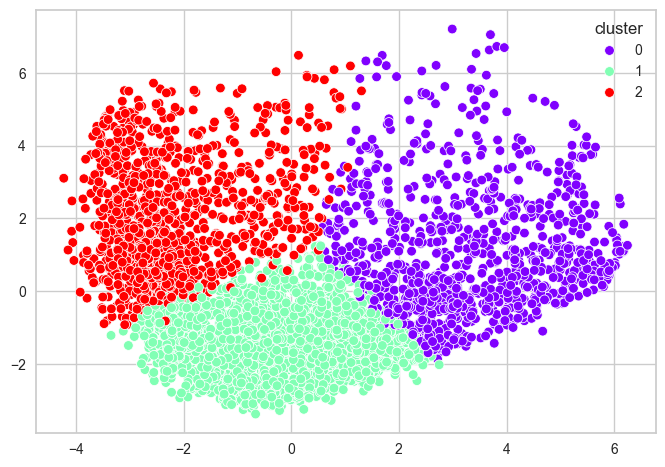

In [481]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=0.95)
pca_2d.fit(data_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(data_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='rainbow')

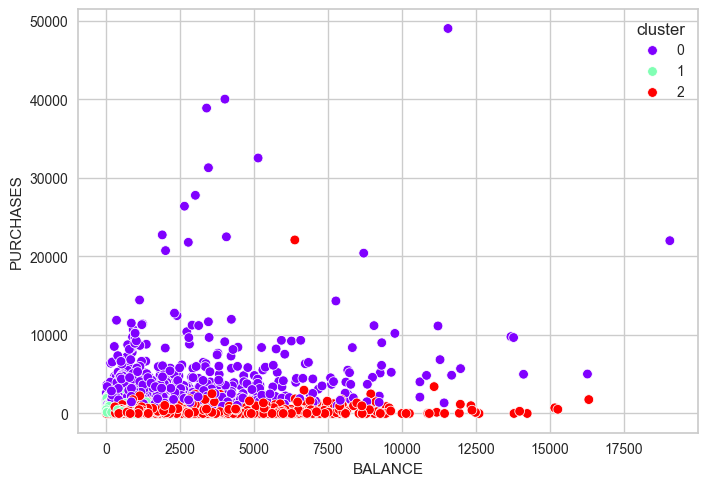

In [482]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="PURCHASES", hue="cluster", palette="rainbow");

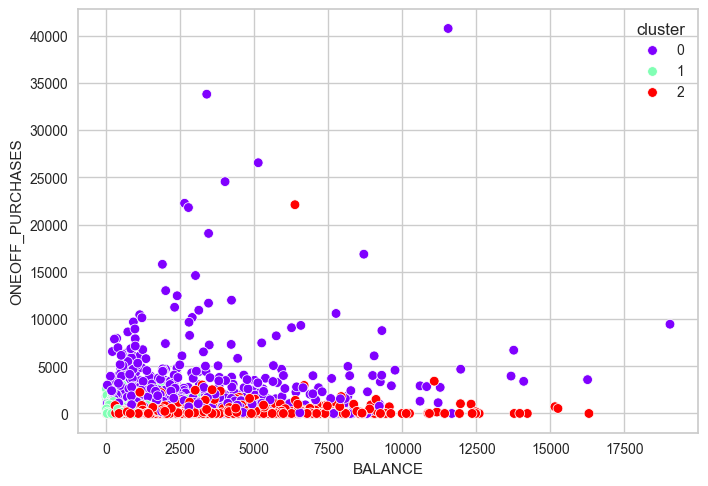

In [483]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="ONEOFF_PURCHASES", hue="cluster", palette="rainbow");

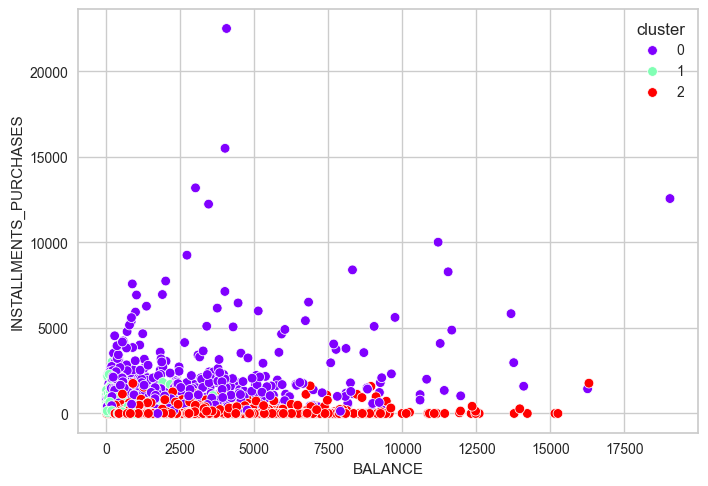

In [484]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="INSTALLMENTS_PURCHASES", hue="cluster", palette="rainbow");

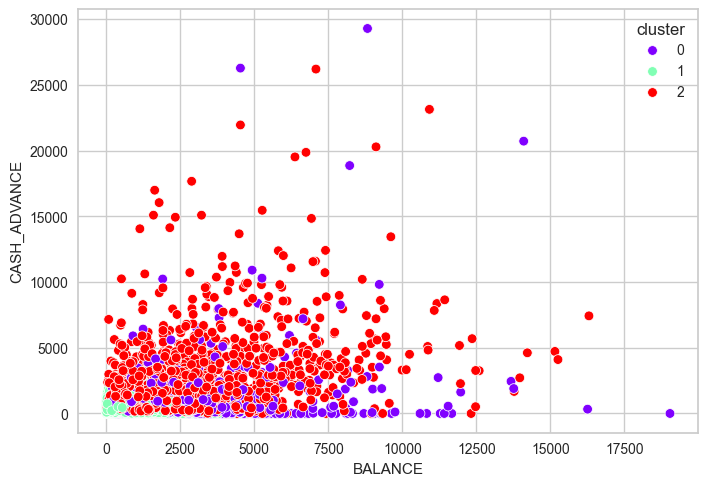

In [485]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="CASH_ADVANCE", hue="cluster", palette="rainbow");

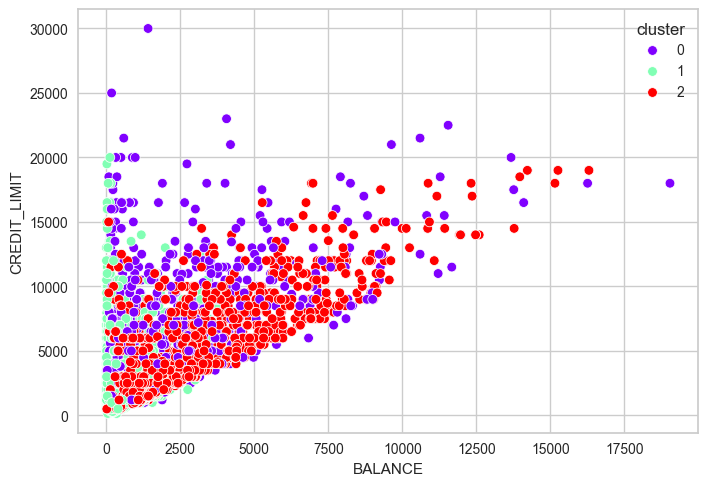

In [486]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="CREDIT_LIMIT", hue="cluster", palette="rainbow");

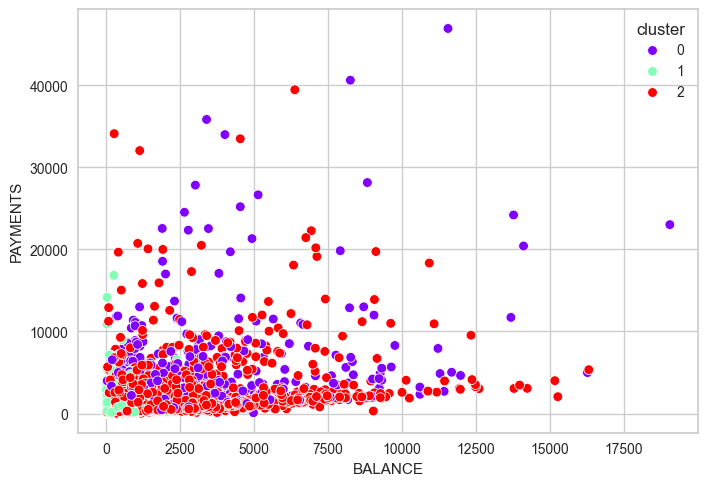

In [487]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="PAYMENTS", hue="cluster", palette="rainbow");

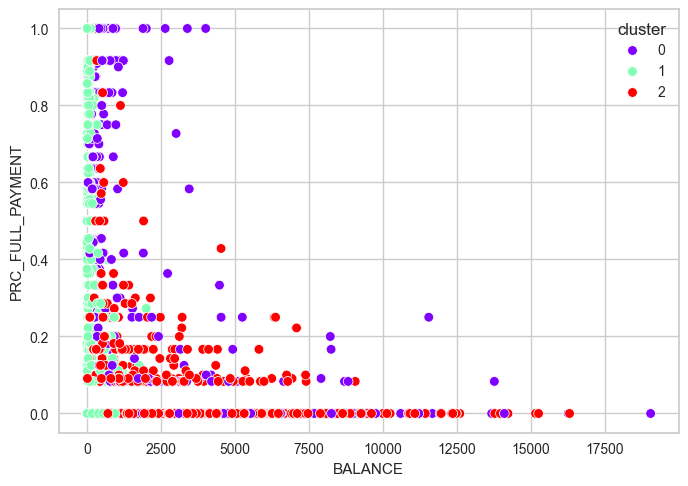

In [488]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="PRC_FULL_PAYMENT", hue="cluster", palette="rainbow");

Hasil Visualisasi antar Cluster:

1. Cluster 0 didominasi User dengan perilaku penggunaan kartu kredit untuk membeli barang, mendominasi nilai oneoff-purchases atau nilai belanja yang tinggi dalam sekali transaksi dan penggunaan kartu kredit untuk pembayaran cicilan. Dengan kata lain cluster 0 membawa karakteristik menggunakan kartu kredit untuk berbelanja dengan berbagai macam metode yang ada.
2. Cluster 1 identik dengan nilai balance yang rendah atau saldo yang tersisa untuk membeli barang atau mengambil uang rendah, dapat dikatakan bahwa cluster 1 merupakan pengguna baru kartu kredit atau pengguna lama yang tidak memaksimalkan penggunaan kartu sehingga nilai balance yang mereka kecil.
3. Cluster 2 didominasi User dengan perilaku penggunaan kartu kredit untuk cash advance atau mengambil uang cash. Dengan nilai persebaran data yang bervariatif dapat dikatakan bahwa cluster 2 lebih menggunakan kartu kredit untuk pengambilan uang cash dibandingkan dengan menggunakan kartu kredit untuk berbelanja

# Model Saving

In [489]:
# download num_cols, scaler, dan model yang sudah dipilih

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca2, file_3)

with open('model_saving.pkl', 'wb') as file_4:
  pickle.dump(km2, file_4)

# Model Inference

In [490]:
data_clean.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,1600.114511,0.895236,1025.274057,600.770438,424.888909,986.980658,0.495675,0.205447,0.369805,0.136236,3.252549,14.801900,4524.431479,1785.801612,854.624165,0.162997,11.531511
std,2107.347942,0.206730,2241.729131,1690.105736,940.627467,2159.134558,0.399564,0.299252,0.398217,0.200511,6.576772,24.473182,3688.856008,2997.093142,2306.642962,0.299700,1.324580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000
25%,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000
50%,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000
75%,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [491]:
# memanggil data yang sudah di download

with open('list_num_cols.txt', 'r') as file_1:
  list_num_cols = json.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = pickle.load(file_2)

with open('pca.pkl', 'rb') as file_3:
  pca = pickle.load(file_3)

with open('model_saving.pkl', 'rb') as file_4:
  model_km = pickle.load(file_4)

In [492]:
# menggunakan data baru untuk clustering dengan model KMeans
data_inf = {
    'CUST_ID' : 5555,
    'BALANCE' : 8000,
    'BALANCE_FREQUENCY' : 0.75,
    'PURCHASES' : 700,
    'ONEOFF_PURCHASES' : 1500,
    'INSTALLMENTS_PURCHASES' : 2400,
    'CASH_ADVANCE' : 1400,
    'PURCHASES_FREQUENCY' : 0.3,
    'ONEOFF_PURCHASES_FREQUENCY' : 0.3,
    'PURCHASES_INSTALLMENTS_FREQUENCY' : 0.3,
    'CASH_ADVANCE_FREQUENCY' : 0.3,
    'CASH_ADVANCE_TRX' : 0,
    'PURCHASES_TRX' : 10,
    'CREDIT_LIMIT' : 5000,
    'PAYMENTS' : 7999,
    'MINIMUM_PAYMENTS' : 5000,
    'PRC_FULL_PAYMENT' : 1,
    'TENURE' : 6
}

data_inf = pd.DataFrame([data_inf])
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5555,8000,0.75,700,1500,2400,1400,0.3,0.3,0.3,0.3,0,10,5000,7999,5000,1,6


In [493]:
# Define Kategorikal dan numerical kolom

data_num_inf = data_inf[list_num_cols]
data_num_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8000,0.75,700,1500,2400,1400,0.3,0.3,0.3,0.3,0,10,5000,7999,5000,1,6


In [494]:
# Scaling dan encoding data
data_inf_scaled = scaler.transform(data_num_inf)
data_inf_scaled

array([[ 4.23563673, -2.14622492, -0.06797157,  2.14535729,  4.99544949,
         0.74447747, -0.48977886,  0.38313053, -0.1753147 ,  0.93378941,
        -0.70112952, -0.13625259,  0.16168229,  5.17741237,  7.9629591 ,
         5.61255332, -4.17653414]])

In [495]:
# PCA data inference
data_inf_pca = pca.transform(data_inf_scaled)

In [496]:
# menggabungkan data
data_inf_final = np.concatenate([data_inf_pca], axis=1)
data_inf_final

array([[ 2.56484528,  5.69351816,  1.07716614,  3.96067961, -2.88700917,
         5.95580869, -0.01632196,  7.36323232, -3.92633409, -2.21192069]])

In [497]:
# Clustering dengan Metode KMeans data numeric
pred_cluster = model_km.predict(data_inf_final)
pred_cluster

array([0])

# Kesimpulan

Kesimpulan :

- Dari data pengguna kartu kredit didapat nilai maksimum cluster sebesar 3 kluster, dimana n_kluster ditentukan dari perhitungan elbow method dan silhouette score dan silhouette plot yang ada.

- Kelemahan dari permodelan KMeans ini masih terdapat oulier di beberapa cluster yang ada. Outlier pada cluster ini dapat didefinisikan salah prediksi cluster untuk beberapa data yang ada. 

- Dari beberapa kluster tersebut dapat dilihat bahwa:
1. Cluster 0 didominasi User dengan perilaku penggunaan kartu kredit untuk membeli barang, mendominasi nilai oneoff-purchases atau nilai belanja yang tinggi dalam sekali transaksi dan penggunaan kartu kredit untuk pembayaran cicilan. Dengan kata lain cluster 0 membawa karakteristik menggunakan kartu kredit untuk berbelanja dengan berbagai macam metode yang ada.
2. Cluster 1 identik dengan nilai balance yang rendah atau saldo yang tersisa untuk membeli barang atau mengambil uang rendah, dapat dikatakan bahwa cluster 1 merupakan pengguna baru kartu kredit atau pengguna lama yang tidak memaksimalkan penggunaan kartu sehingga nilai balance yang mereka kecil.
3. Cluster 2 didominasi User dengan perilaku penggunaan kartu kredit untuk cash advance atau mengambil uang cash. Dengan nilai persebaran data yang bervariatif dapat dikatakan bahwa cluster 2 lebih menggunakan kartu kredit untuk pengambilan uang cash dibandingkan dengan menggunakan kartu kredit untuk berbelanja